In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv("/kaggle/input/pengueins/penguins.csv")




/kaggle/input/pengueins/penguins.csv


In [16]:
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
print(f"Shape of the dataset: {df.shape}")
print("First 5 rows:")
print(df.head())

Shape of the dataset: (344, 9)
First 5 rows:
   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen             NaN            NaN   
4           5  Adelie  Torgersen            36.7           19.3   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1              186.0       3800.0  female  2007  
2              195.0       3250.0  female  2007  
3                NaN          NaN     NaN  2007  
4              193.0       3450.0  female  2007  


In [4]:
print("\nInformation: ")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None

Summary Statistics:
       Unnamed: 0  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793   

In [ ]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [50]:
df=df.drop(['Unnamed: 0'],axis=1)

In [51]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Missing Values in Each Column:
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


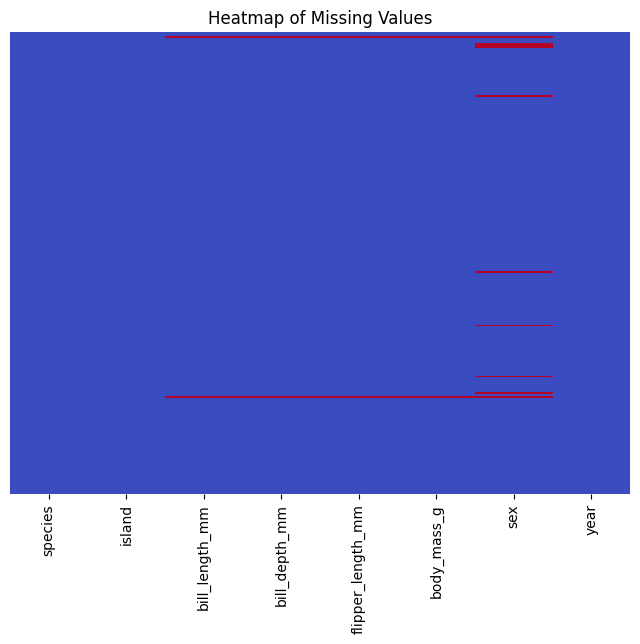

In [52]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()


Summary Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  

Unique Values in Each Categorical Column:
species: 3 unique values
island: 3 unique values
sex: 2 unique values


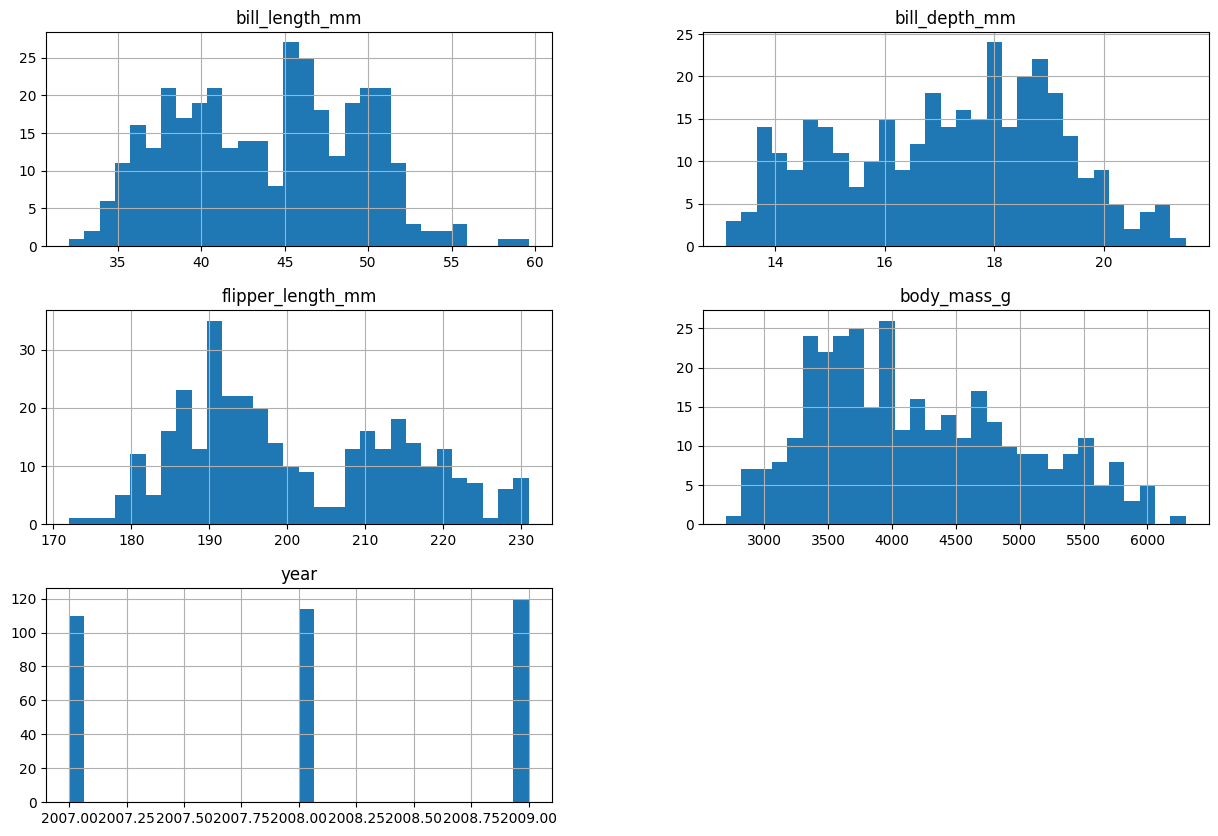

In [54]:
print("\nSummary Statistics:")
print(df.describe())

print("\nUnique Values in Each Categorical Column:")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

df.hist(figsize=(15, 10), bins=30)
plt.show()

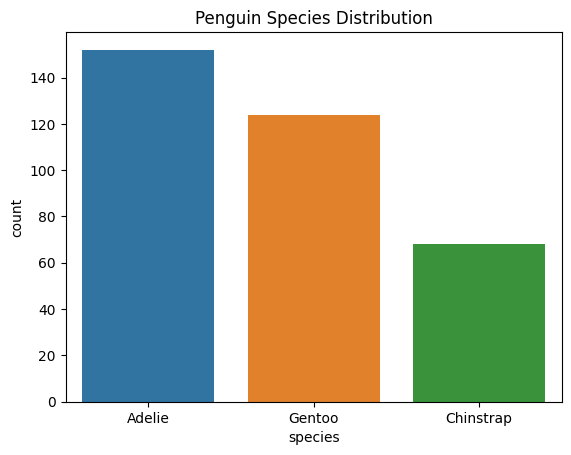

In [55]:
# Distribution of species
sns.countplot(data=df, x='species')
plt.title('Penguin Species Distribution')
plt.show()

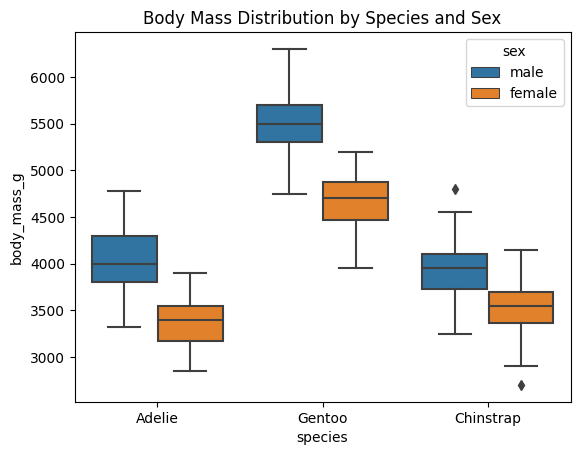

In [56]:
sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex')
plt.title('Body Mass Distribution by Species and Sex')
plt.show()

In [57]:
X=df.drop(['species'],axis=1)
y=df['species']

In [58]:
numeric_df = X.select_dtypes(include=['number'])
categorical_df = X.select_dtypes(exclude=['number'])

In [59]:
# Numeric Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_df.columns),
        ('cat', categorical_transformer, categorical_df.columns)
    ]
)

# Final pipeline including the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)


print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Feature Importances
model = pipeline.named_steps['classifier']
feature_importances = model.feature_importances_

# Getting feature names after preprocessing
feature_names = numeric_df.columns.tolist() + pipeline.named_steps['preprocessor'].transformers_[1][1]['encoder'].get_feature_names_out(categorical_df.columns).tolist()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", importance_df)

Accuracy: 1.0

Confusion Matrix:
 [[34  0  0]
 [ 0 11  0]
 [ 0  0 24]]

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        34
   Chinstrap       1.00      1.00      1.00        11
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69


Feature Importances:
               Feature  Importance
2   flipper_length_mm    0.499545
0      bill_length_mm    0.345726
5       island_Biscoe    0.064703
8          sex_female    0.038027
6        island_Dream    0.033999
1       bill_depth_mm    0.018000
3         body_mass_g    0.000000
4                year    0.000000
7    island_Torgersen    0.000000
9            sex_male    0.000000
10        sex_missing    0.000000


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'preprocessor__num__imputer__strategy': 'mean'}
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        34
   Chinstrap       1.00      1.00      1.00        11
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



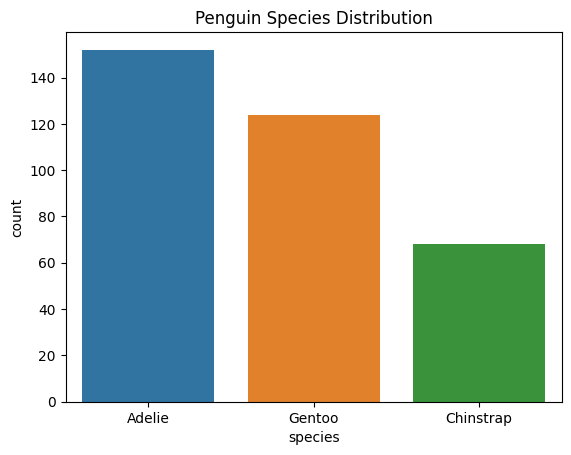

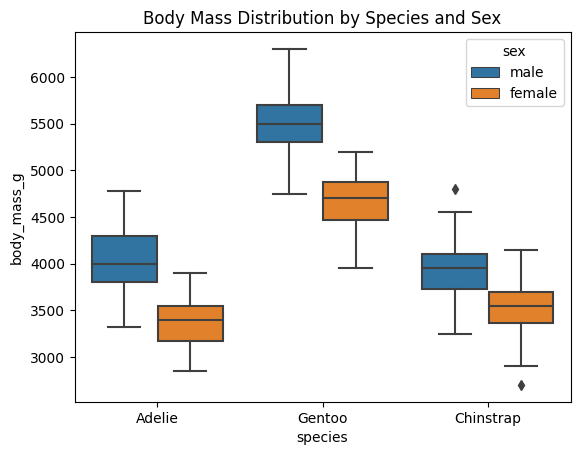

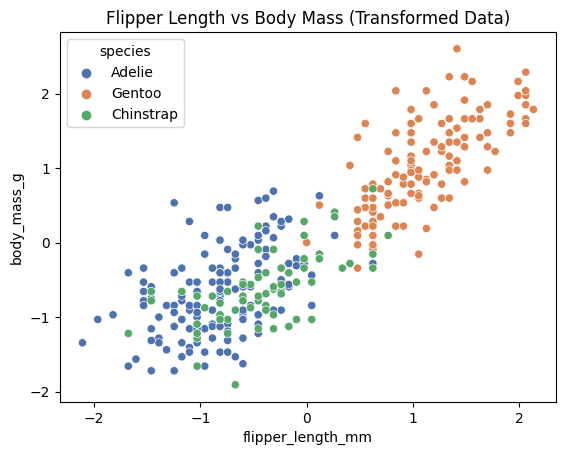

In [74]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('//kaggle/input/pengueins/penguins.csv')  
df = df.drop(columns=['Unnamed: 0'])  

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Define numeric and categorical features
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = ['island', 'sex']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),  
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the final pipeline including the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Set up parameter grid for GridSearchCV
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_pipeline = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict on the test data
y_pred = best_pipeline.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


# Extract transformed data from the best pipeline for visualization
X_transformed = best_pipeline.named_steps['preprocessor'].transform(X)
encoded_categorical_columns = best_pipeline.named_steps['preprocessor'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(encoded_categorical_columns)

# Convert to DataFrame for visualization
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)
X_transformed_df['species'] = y.values

# Distribution of species
sns.countplot(data=df, x='species')
plt.title('Penguin Species Distribution')
plt.show()

sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex')
plt.title('Body Mass Distribution by Species and Sex')
plt.show()


# Scatter plot of Flipper Length vs Body Mass (Transformed)
sns.scatterplot(data=X_transformed_df, x='flipper_length_mm', y='body_mass_g', hue='species', palette="deep")
plt.title("Flipper Length vs Body Mass (Transformed Data)")
plt.show()
